<a href="https://colab.research.google.com/github/DeveloperHasanKhan/DeveloperHasanKhan/blob/main/Assignment_06_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/datasets1/Breast_Cancer_Wisconsin_Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Question 1: Find the Best Tree Depth

#Task: Test depths 2, 3, 4, 5,7,8,9 and find highest accuracy

print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'smoothness_se',
    'compactness_se',
    'concave points_se',
    'fractal_dimension_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'smoothness_worst',
    'concavity_worst',
    'symmetry_worst',
]

# Create simple dataset

X = df[important_features]  # Patient measurements
y = df['diagnosis_numeric']  # Malignant (1) or Benign (0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

#Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

# Create model

skillmorph_doctor = DecisionTreeClassifier(
    max_depth=8,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)


print("Now let's see how good our Skill Morph doctor is...")
print("Testing on patients it has NEVER seen before!")

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)
print("Skill Morph doctor made predictions for all test patients!")
print(f"Note: We also got probability scores (confidence levels) for each prediction!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!
Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     smoothness_se  compactness_se  concave points_se  fractal_dimension_se  \
412       0.005515        0.026740           0.005128              0.004583   
461       0.007650        0.053740           0.025980              0.004558   
532       0.003828        0.007228           0.005077              0.001697   
495       0.005415        0.013710           0.011830              0.001812   
13        0.009769        0.031260           0.019920              0.003002   

     radius_worst  texture_worst  perimeter_worst  smoothness_worst  \
412         9.965          27.99            66.61            0.1086   
461        36.040          31.37           251.20            0.1357   
532        15.85

 MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:


2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers

Precision Score:  0.9574468085106383
Recall Score:  0.9375
F1 Score:  0.9473684210526315


Text(0, 0.5, 'Score (0-1)')

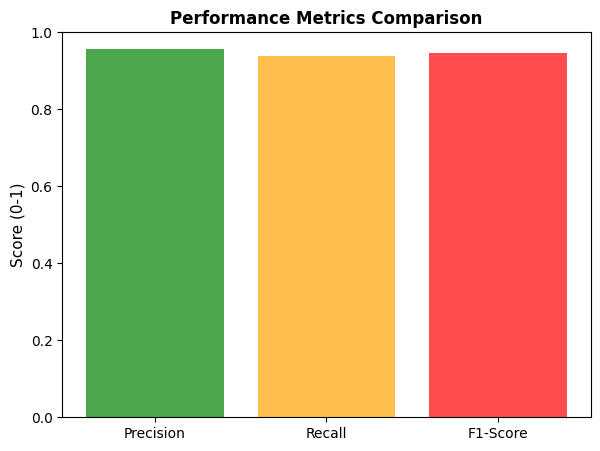

In [ ]:
#Question 2: Calculate All Metrics

#Task: Use best depth to calculate precision, recall, F1-score

print(""" MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:


2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers
""")

# Calculate detailed metrics

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Precision', 'Recall', 'F1-Score']
values = [ precision, recall, f1]
colors = ['green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)



In [8]:
#Question 3: Test on New Patients

print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'smoothness_se',
    'compactness_se',
    'concave points_se',
    'fractal_dimension_se',
    'radius_worst',
]

# Create simple dataset

X = df[important_features]  # Patient measurements
y = df['diagnosis_numeric']  # Malignant (1) or Benign (0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

#Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

# Create model

skillmorph_doctor = DecisionTreeClassifier(
    max_depth=4,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)


print("Now let's see how good our Skill Morph doctor is...")
print("Testing on patients it has NEVER seen before!")

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)
print("Skill Morph doctor made predictions for all test patients!")
print(f"Note: We also got probability scores (confidence levels) for each prediction!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!
Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     smoothness_se  compactness_se  concave points_se  fractal_dimension_se  \
412       0.005515        0.026740           0.005128              0.004583   
461       0.007650        0.053740           0.025980              0.004558   
532       0.003828        0.007228           0.005077              0.001697   
495       0.005415        0.013710           0.011830              0.001812   
13        0.009769        0.031260           0.019920              0.003002   

     radius_worst  
412         9.965  
461        36.040  
532        15.850  
495        16.010  
13         16.840  
Now let's see how good our Skill Morph doctor is...
Testing on patients it has NEVER seen before!
Skill Morph

Confusion Matrix (Mistake Analysis):
[[64  2]
 [ 3 45]]

How to read Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Real Benign     64        2   ← 2 False Alarms (predicted malignant but was benign)
Real Malignant  3        45   ← 3 Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: 109
❌ Wrong Predictions: 5

⚠️ DANGER: Missing malignant cancer (3 cases) is more dangerous than false alarms (2 cases)



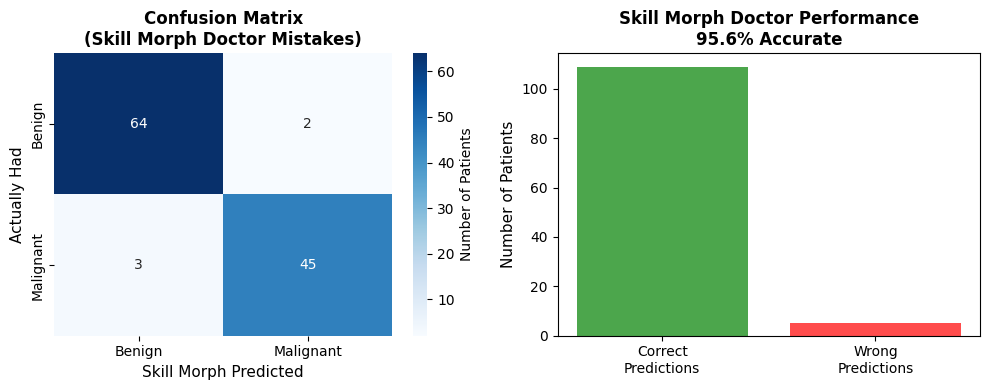

In [ ]:
#Question 4: Analyze Confusion Matrix

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}   ← {cm[0,1]} False Alarms (predicted malignant but was benign)
Real Malignant  {cm[1,0]}        {cm[1,1]}   ← {cm[1,0]} Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing malignant cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()